In [2]:
# https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html

import numpy as np
import pylab as plt
from sklearn import neighbors, datasets
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

## IRIS Dataset

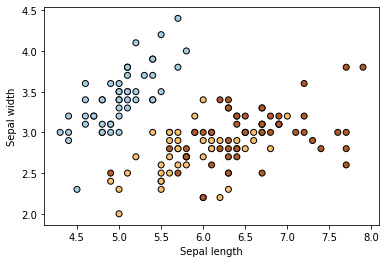

In [13]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target

plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.savefig('iris.pdf', transparent=True, bbox_inches="tight")

### interesting side note: why setosa was getting high in random forest

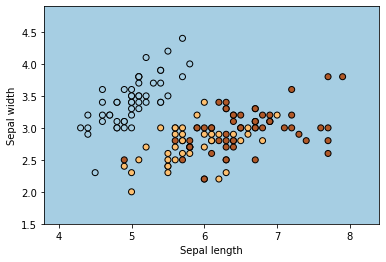

In [20]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .02 # step size in the mesh
K = 150
knn=neighbors.KNeighborsClassifier(n_neighbors=K)
knn.fit(X, Y)
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.savefig('iris_knn_{}.pdf'.format(K), transparent=True, bbox_inches="tight")
plt.show()

In [21]:
def probDist(pts, K, c):
    pairDist = cdist([pts], X, 'euclidean')
    idx = np.argsort(pairDist[0])[1:K+1]
    return (Y[idx] == c).sum()/K

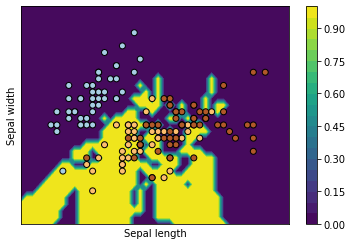

In [30]:
K = 1
B = 1

h = .1 # step size in the mesh
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.array([probDist(temp, K, B) for temp in np.c_[xx.ravel(), yy.ravel()]])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z, 20, cmap='viridis')
plt.colorbar();

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.savefig('iris_prob_{}_{}.pdf'.format(K, B), transparent=True, bbox_inches="tight")
plt.show()

## Random Blobs

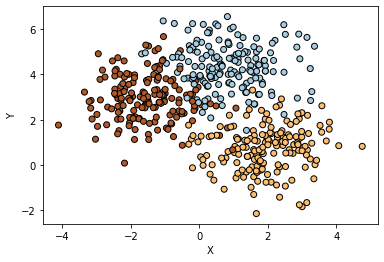

In [36]:
X, Y = datasets.make_blobs(n_samples=500, centers=3, n_features=2, random_state=0, cluster_std=1)

plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('big.pdf'.format(K, B), transparent=True, bbox_inches="tight")

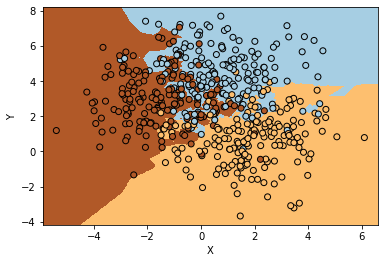

In [109]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .02 # step size in the mesh
knn=neighbors.KNeighborsClassifier()
knn.fit(X, Y)
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

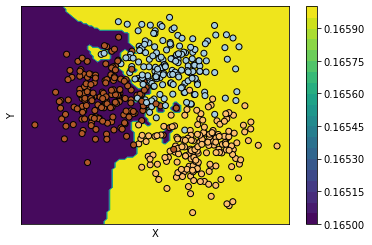

In [120]:
K = 1000
B = 2

h = .1 # step size in the mesh
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.array([probDist(temp, K, B) for temp in np.c_[xx.ravel(), yy.ravel()]])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z, 20, cmap='viridis')
plt.colorbar();

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


### Example 1

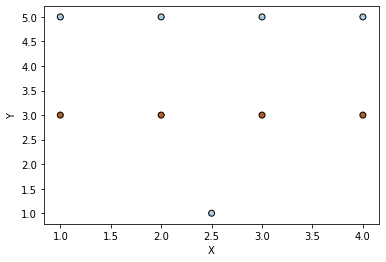

In [31]:
X = np.array([[1,5],[2,5],[3,5],[4,5],[1,3],[2,3],[3,3],[4,3],[2.5,1]])
Y = np.array([0,0,0,0,1,1,1,1,0])

plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('exp.pdf', transparent=True, bbox_inches="tight")

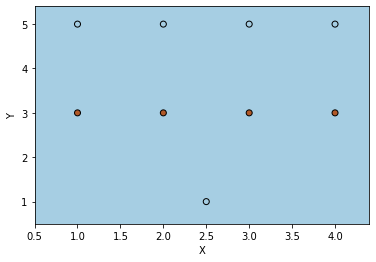

In [35]:
h = .1 # step size in the mesh
K = 9
knn=neighbors.KNeighborsClassifier(n_neighbors=K)
knn.fit(X, Y)
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.savefig('exp_knn_{}.pdf'.format(K), transparent=True, bbox_inches="tight")
plt.show()

### Example 2

Text(0, 0.5, 'Y')

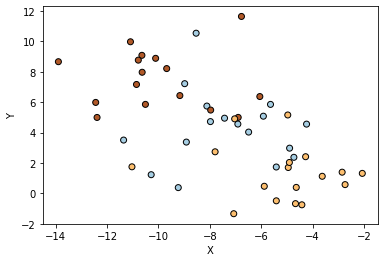

In [184]:
# X, Y = datasets.make_blobs(n_samples=50, centers=3, n_features=2, random_state=12, cluster_std=2)

# plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
# plt.xlabel('X')
# plt.ylabel('Y')

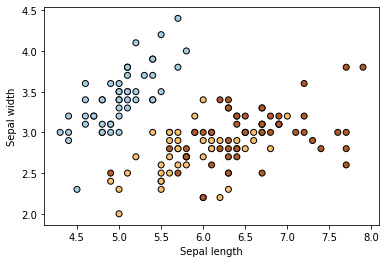

In [192]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target

plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.savefig('iris.pdf', transparent=True, bbox_inches="tight")

In [196]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_err = []
test_err = []
k_list = [t for t in range(1,100)]
for k in k_list:
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Z_train = knn.predict(X_train)
    Z_test = knn.predict(X_test)
    
    train_err.append((Z_train != Y_train).sum()/Y_train.size)
    test_err.append((Z_test != Y_test).sum()/Y_test.size)
    #print(k,(Z_train != Y_train).sum()/Y_train.size, (Z_test != Y_test).sum()/Y_test.size)

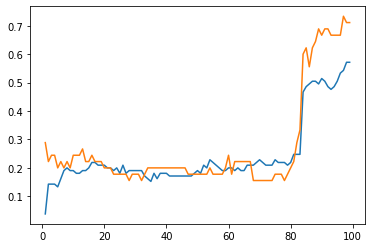

In [197]:
plt.plot(k_list, train_err)
plt.plot(k_list, test_err)

## Other Distance Metrics

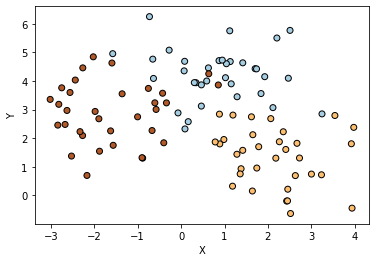

In [12]:
X, Y = datasets.make_blobs(n_samples=100, centers=3, n_features=2, random_state=0, cluster_std=1)

plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')

plt.savefig('iris_knn_data.pdf'.format(K), transparent=True, bbox_inches="tight")

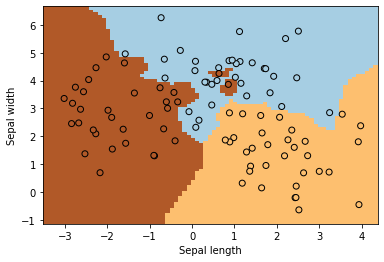

In [8]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .1 # step size in the mesh
K = 1
knn=neighbors.KNeighborsClassifier(n_neighbors=K)
knn.fit(X, Y)
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.savefig('iris_knn_def_{}.pdf'.format(K), transparent=True, bbox_inches="tight")
plt.show()

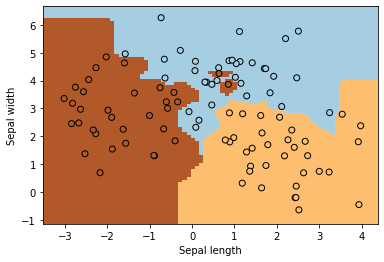

In [9]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .1 # step size in the mesh
K = 1
knn=neighbors.KNeighborsClassifier(n_neighbors=K, metric="manhattan")
knn.fit(X, Y)
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.savefig('iris_knn_man_{}.pdf'.format(K), transparent=True, bbox_inches="tight")
plt.show()

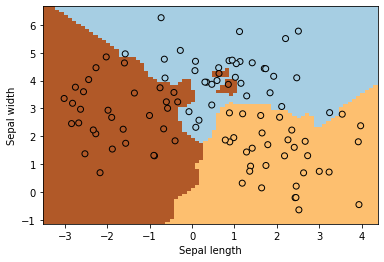

In [11]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .1 # step size in the mesh
K = 1
knn=neighbors.KNeighborsClassifier(n_neighbors=K, metric="chebyshev")
knn.fit(X, Y)
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.savefig('iris_knn_che_{}.pdf'.format(K), transparent=True, bbox_inches="tight")
plt.show()

### Curse of Dimensionality